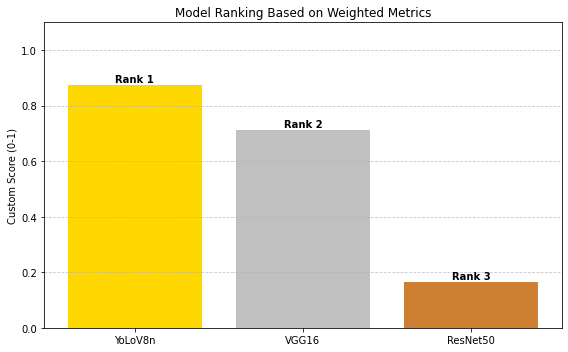

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Input data
data = {
    'Model': ['ResNet50', 'YoLoV8n', 'VGG16'],
    'Precision': [0.7866, 0.9274, 0.9467],
    'Recall': [0.7733, 0.9068, 0.9366],
    'F1_score': [0.7766, 0.9067, 0.9333],
    'Accuracy': [0.7733, 0.9038, 0.9365],
    'Parameters (M)': [23.85, 1.44, 21.14],
    'Training Run Time (s)': [513.48, 398.22, 2092.37],
    'Test Run Time (s)': [12.39, 7.65, 25.4]
}

df = pd.DataFrame(data)

# Normalize metrics
scaler = MinMaxScaler()

# Metrics to be maximized
df[['F1_score', 'Accuracy']] = scaler.fit_transform(df[['F1_score', 'Accuracy']])

# Metrics to be minimized (invert after scaling)
df[['Parameters (M)', 'Training Run Time (s)', 'Test Run Time (s)']] = \
    1 - scaler.fit_transform(df[['Parameters (M)', 'Training Run Time (s)', 'Test Run Time (s)']])

# Weighted score calculation
df['Custom_Score'] = (
    0.5 * df['F1_score'] +
    0.2 * df['Accuracy'] +
    0.1 * df['Parameters (M)'] +
    0.1 * df['Training Run Time (s)'] +
    0.1 * df['Test Run Time (s)']
)

# Rank models (1 = best)
df['Rank'] = df['Custom_Score'].rank(ascending=False).astype(int)

# Sort for plotting
df_sorted = df.sort_values(by='Rank')

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(df_sorted['Model'], df_sorted['Custom_Score'], color=['#FFD700', '#C0C0C0', '#CD7F32'])
for i, v in enumerate(df_sorted['Custom_Score']):
    plt.text(i, v + 0.01, f"Rank {df_sorted['Rank'].iloc[i]}", ha='center', fontweight='bold')
plt.title("Model Ranking Based on Weighted Metrics")
plt.ylabel("Custom Score (0-1)")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
